In [103]:
import pandas as pd

In [104]:
"""
Memuat dataset dari file CSV.

Fungsi ini digunakan untuk memuat dataset dari file CSV dan mengembalikan data dalam bentuk DataFrame.

Parameters:
fname (str): Lokasi file CSV dataset.

Returns:
pd.DataFrame: Data yang dimuat dari file CSV.
"""
def load_data(fname: str):
   data = pd.DataFrame(pd.read_csv(fname), index=None)
   print(f'Data Shape: {data.shape}')
   return data


In [105]:
FNAME = 'data/raw/weather_aus.csv'
data = load_data(FNAME)
data.head()

Data Shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [106]:
categorical_col, contin_val=[],[]

for i in data.columns:
    
    if data[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [107]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [108]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

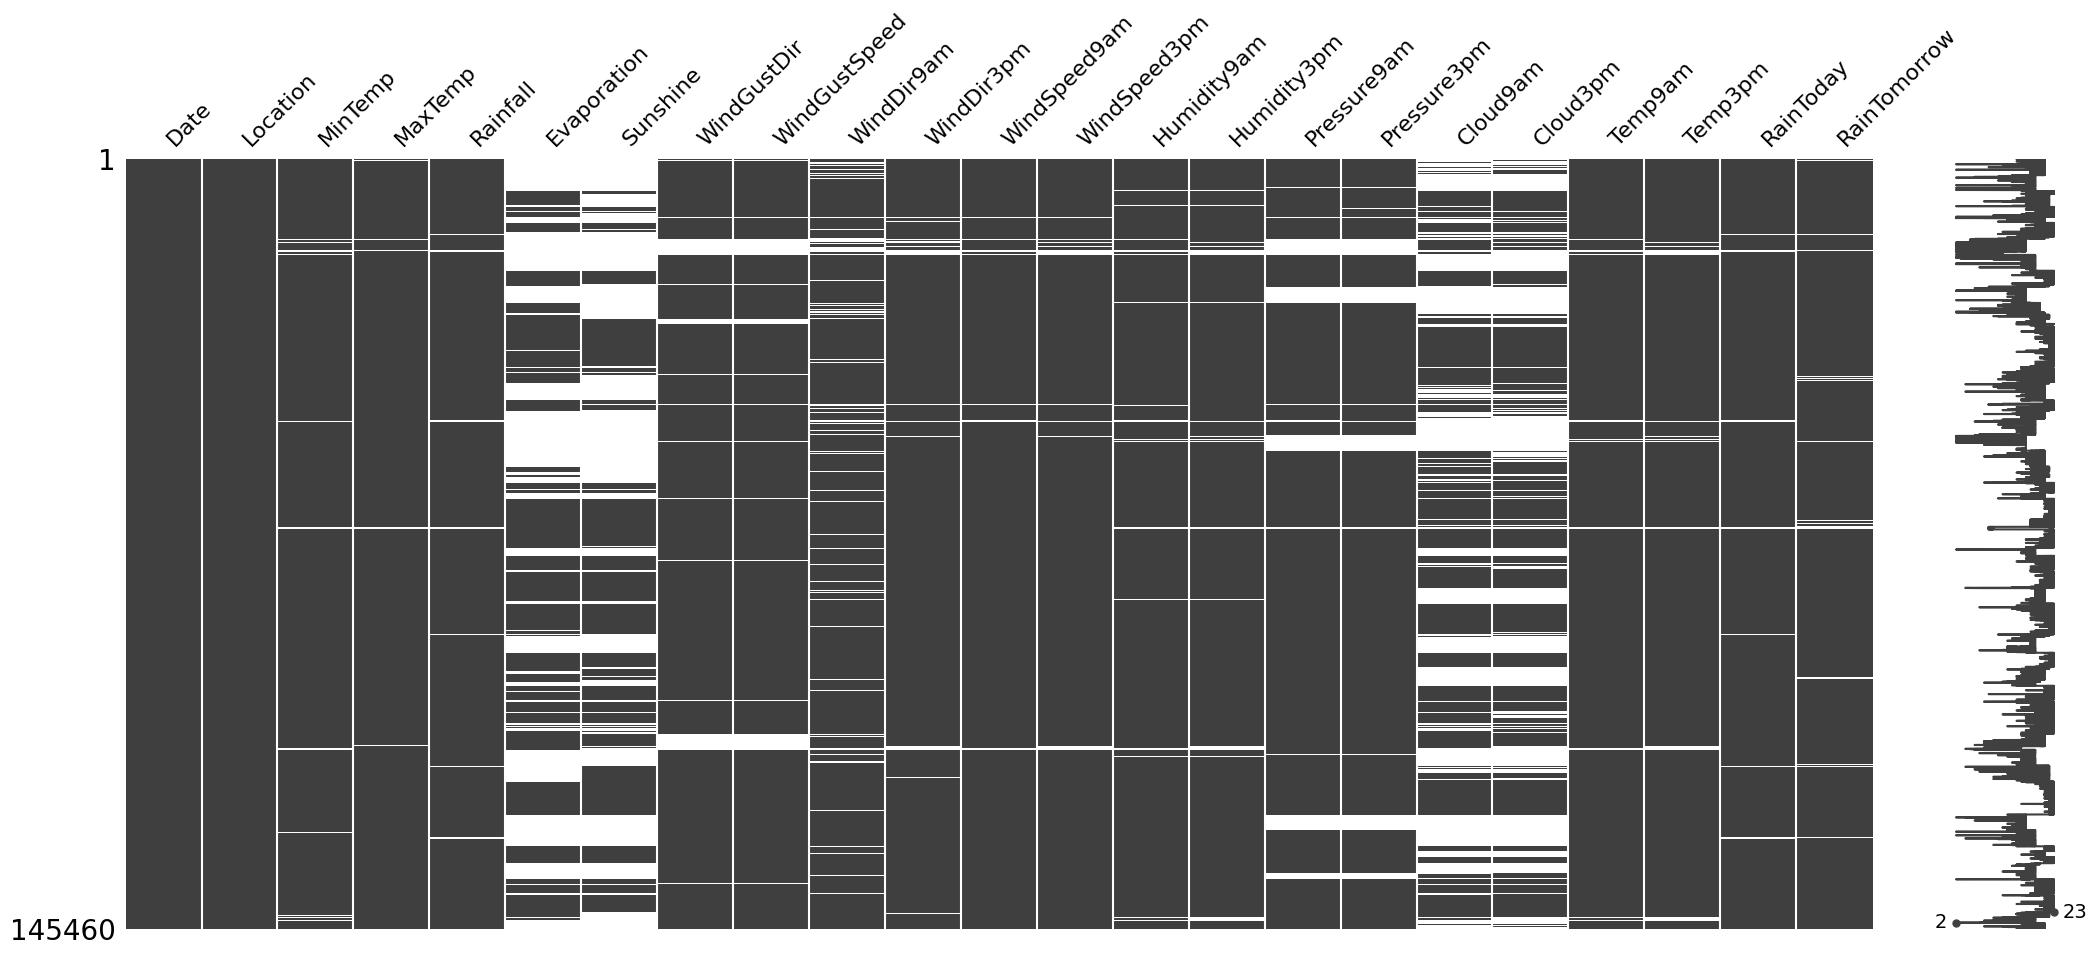

In [109]:
import missingno as msno
msno.matrix(data)

<Axes: >

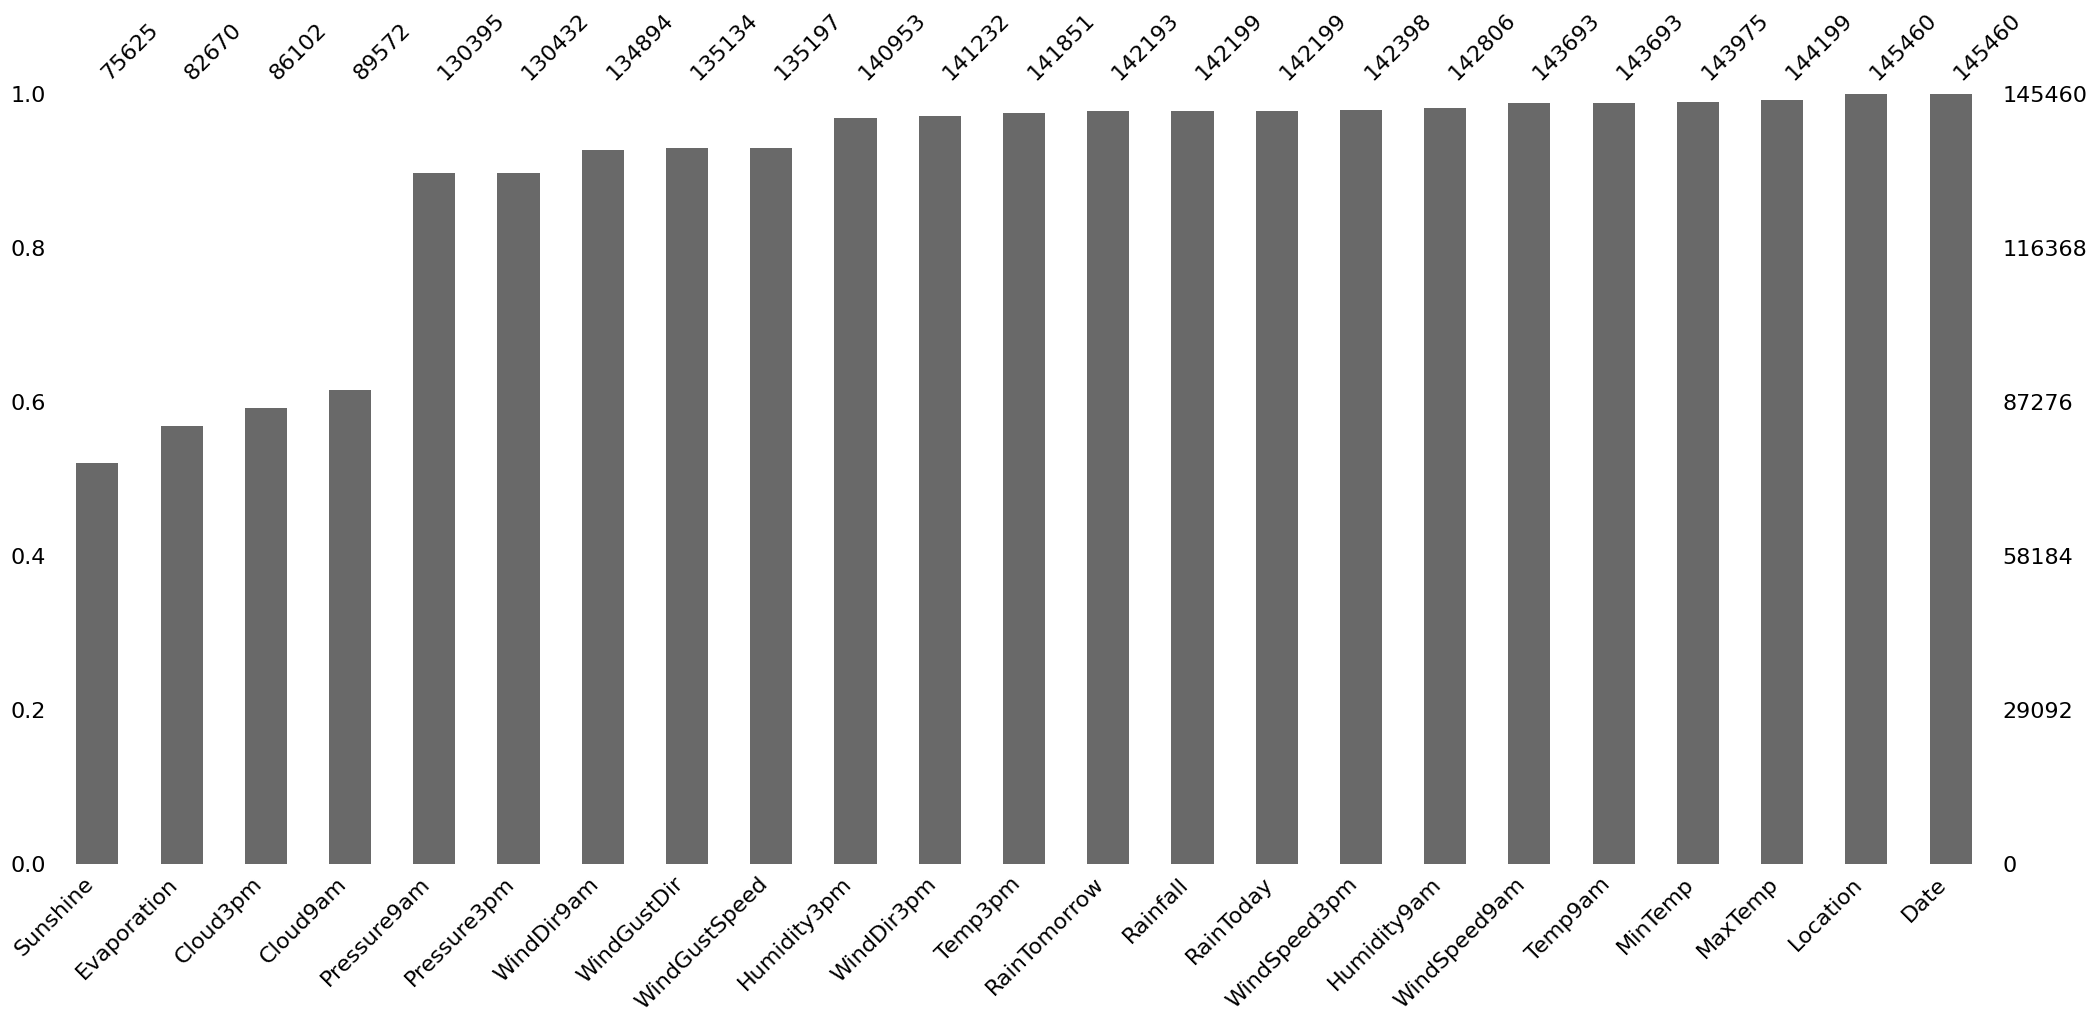

In [110]:
msno.bar(data, sort='ascending')

<Axes: >

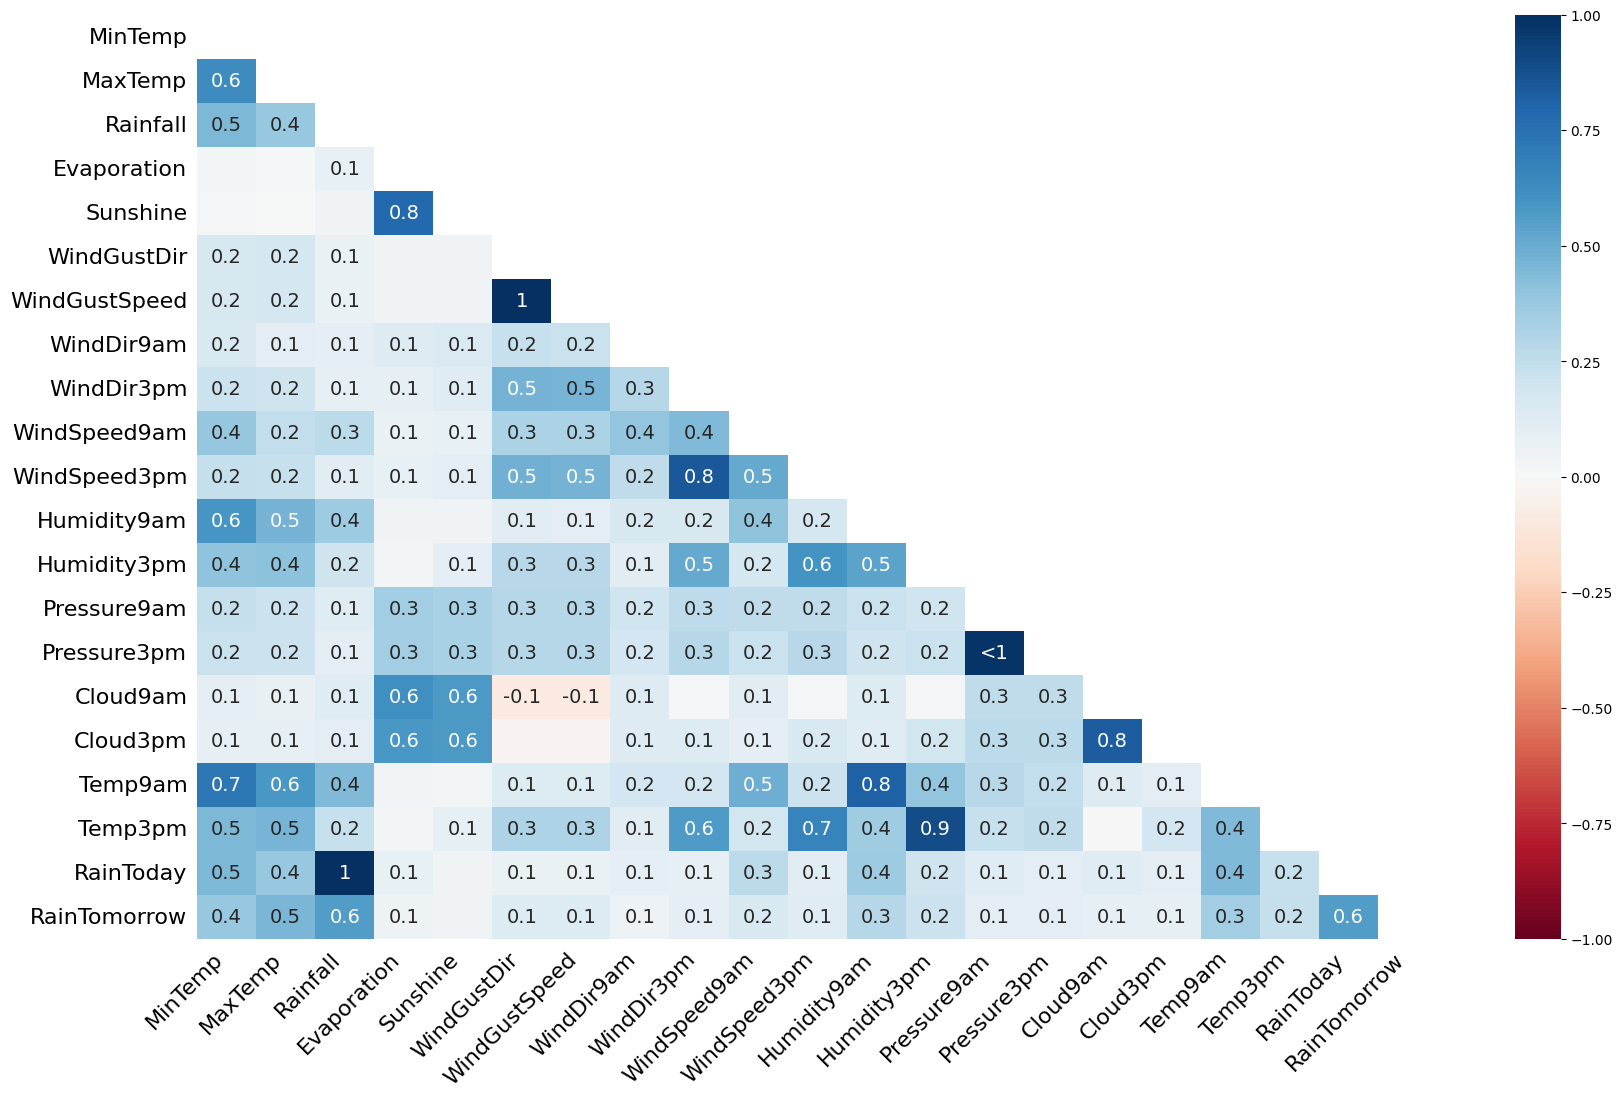

In [111]:
msno.heatmap(data)

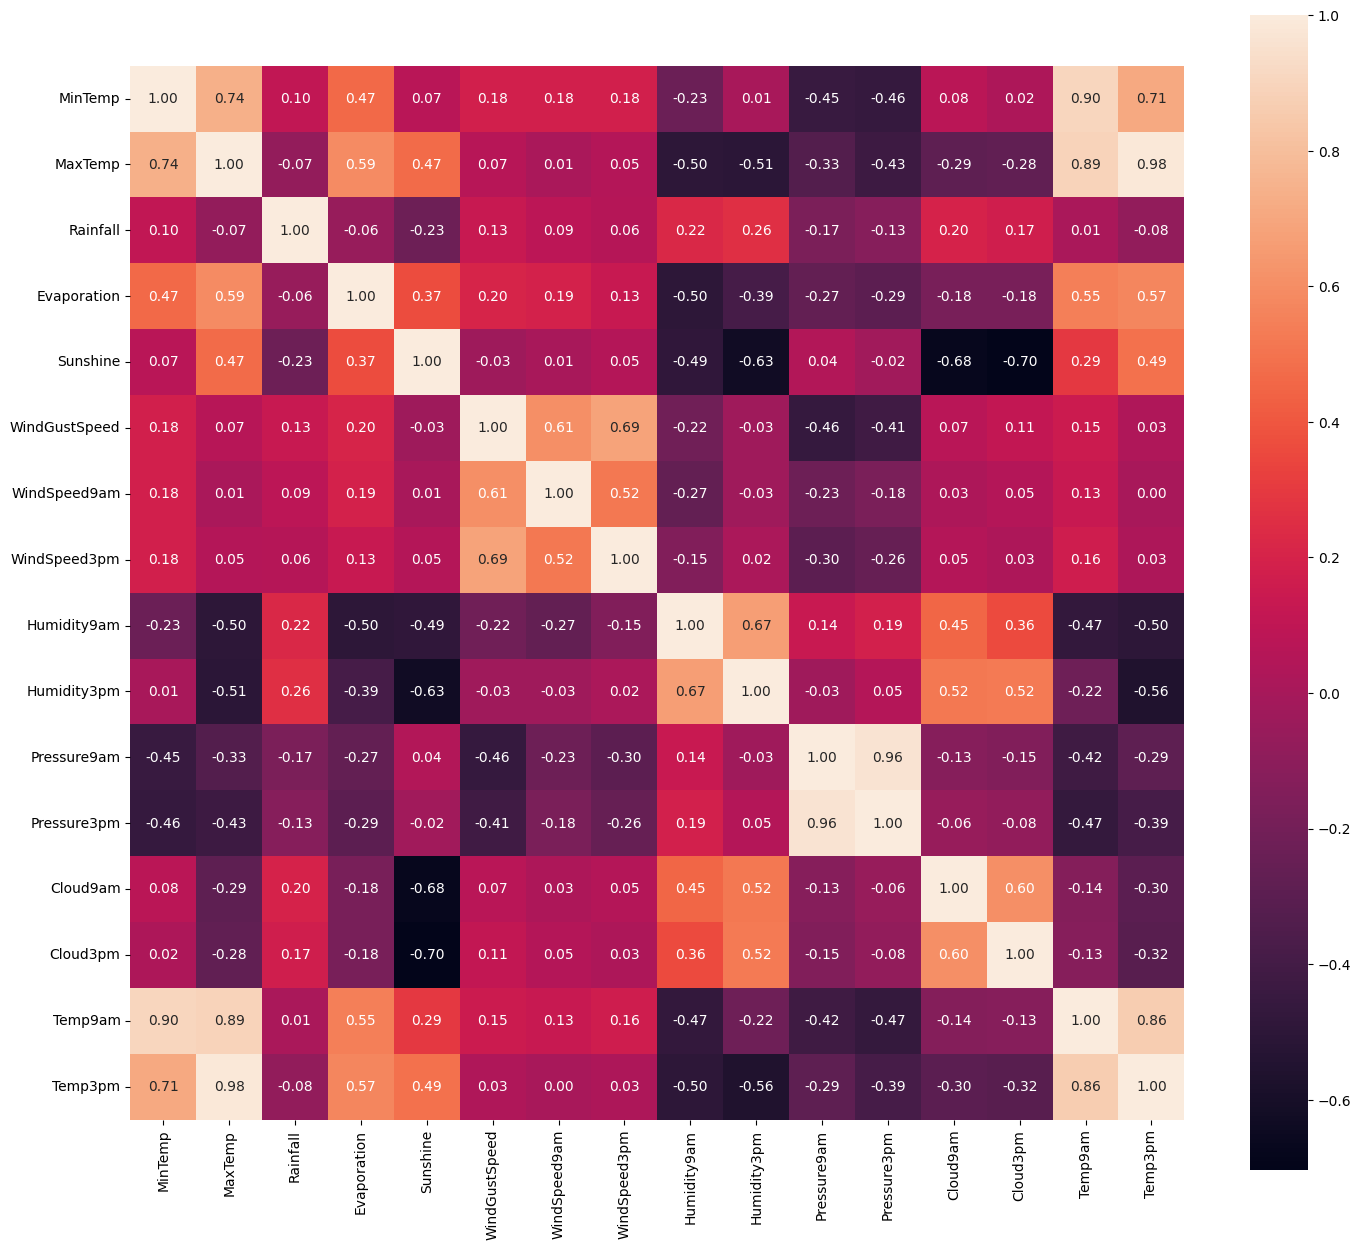

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,15))
data_heatmap = data.drop(columns=categorical_col)
data_heatmap.head()
ax = sns.heatmap(data_heatmap.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [113]:
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

print(data.RainToday)
print(data.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainTomorrow, Length: 145460, dtype: float64


In [114]:
(data.isnull().sum()/len(data))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

In [115]:
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])
#Dropping date column
data=data.iloc[:,1:]
data.head

<bound method NDFrame.head of        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
0                W           44.0          W        

In [116]:
"""
Memisahkan input dan output dari dataset.

Fungsi ini digunakan untuk memisahkan kolom target dari dataset dan mengembalikan data input (X) dan data target (y).

Parameters:
data (pd.DataFrame): Dataset utuh.
target_col (str): Nama kolom yang berisi data target.

Returns:
pd.DataFrame: Data input tanpa kolom target.
pd.Series: Data target.
"""

def split_input_output(data, target_col):
    X = data.drop(columns=target_col)
    y = data[target_col]
    
    print(f"Original data shape: {data.shape}")
    print(f"X data shape: {X.shape}")
    print(f"y data shape: {y.shape}")
    
    return X, y


In [117]:
TARGET_COL = ['RainTomorrow']
X, y = split_input_output(data, TARGET_COL)

Original data shape: (145460, 22)
X data shape: (145460, 21)
y data shape: (145460, 1)


In [118]:
from sklearn.model_selection import train_test_split

"""
Memisahkan dataset menjadi train set dan test set.

Parameters:
X (array-like): Fitur dari dataset.
y (array-like): Target dari dataset.
test_size (float): Proporsi dataset yang akan digunakan sebagai test set.
random_state (int, optional): Seed untuk pengacakan. Default adalah None.

Returns:
X_train (array-like): Fitur dari train set.
X_test (array-like): Fitur dari test set.
y_train (array-like): Target dari train set.
y_test (array-like): Target dari test set.
"""

def split_train_test(X, y, test_size, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    print(f"X train shape: {X_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"y train shape: {y_train.shape}")
    print(f"y test shape: {y_test.shape}")
    
    return X_train, X_test, y_train, y_test

In [119]:
#Panggil fungsi split_train_test pertama kali
X_train, X_non_train, y_train, y_not_train = split_train_test(X, y, test_size=0.2, random_state=123)

#Panggil fungsi split_train_test kedua kali
X_valid, X_test, y_valid, y_test = split_train_test(X_non_train, y_not_train, test_size=0.5, random_state=123)


X train shape: (116368, 21)
X test shape: (29092, 21)
y train shape: (116368, 1)
y test shape: (29092, 1)
X train shape: (14546, 21)
X test shape: (14546, 21)
y train shape: (14546, 1)
y test shape: (14546, 1)


In [120]:
import joblib
"""
Melakukan serialisasi data ke file yang ditentukan.

Parameters:
data (object): Instance yang ingin diserialisasi.
path (str): Alamat dimana data tersebut ingin diserialisasi.

Returns:
None
"""
def serialize_data(data, path):
    joblib.dump(data, path)
    print(f"Data telah diserialisasi ke {path}")


In [121]:
#Panggil fungsi serialize_data untuk setiap dataset
serialize_data(X_train, "data/interim/X_train.pkl")
serialize_data(y_train, "data/interim/y_train.pkl")
serialize_data(X_test, "data/interim/X_test.pkl")
serialize_data(y_test, "data/interim/y_test.pkl")
serialize_data(X_valid, "data/interim/X_valid.pkl")
serialize_data(y_valid, "data/interim/y_valid.pkl")

Data telah diserialisasi ke data/interim/X_train.pkl
Data telah diserialisasi ke data/interim/y_train.pkl
Data telah diserialisasi ke data/interim/X_test.pkl
Data telah diserialisasi ke data/interim/y_test.pkl
Data telah diserialisasi ke data/interim/X_valid.pkl
Data telah diserialisasi ke data/interim/y_valid.pkl


In [122]:
import joblib
"""
Fungsi untuk melakukan deserialisasi data dari file yang disimpan.

Parameters:
path (str): Alamat dimana data tersebut ingin dideserialisasi.

Returns:
data (any): Data yang telah dideserialisasi dari file.
"""
def deserialize_data(path):
    data = joblib.load(path)
    return data
